### **Step-01: Import Libraries**

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 

### **Step-02 : Load Dataset**

In [2]:
df = pd.read_csv('tourist_behavior.csv')
df.head()

,region,nationality,year,month,tourists
0,Africa,AfrOthers,2010,1,6553
1,Africa,AfrOthers,2010,2,5618
2,Africa,AfrOthers,2010,3,6689
3,Africa,AfrOthers,2010,4,5210
4,Africa,AfrOthers,2010,5,4537


## **Exploratory Data Analysis (EDA)**
### **Step-03: Shape of Data**

In [3]:
rows, columns =df.shape
print('The total number of the rows are', rows)
print('The total number of the columns are', columns)

The total number of the rows are 4452
The total number of the columns are 5


### **Step-04: Data Structure**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region       4452 non-null   object
 1   nationality  4452 non-null   object
 2   year         4452 non-null   int64 
 3   month        4452 non-null   int64 
 4   tourists     4452 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 174.0+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,4452,8,Europe,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,4452,53,AfrOthers,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,4452.0,NaN,NaN,NaN,2013.0,2.000225,2010.0,2011.0,2013.0,2015.0,2016.0
month,4452.0,NaN,NaN,NaN,6.5,3.45244,1.0,3.75,6.5,9.25,12.0
tourists,4452.0,NaN,NaN,NaN,38545.158805,72076.012776,104.0,5500.5,14215.5,49870.75,958204.0


### **Find the missing values**

In [6]:
df.isnull().sum()

region         0
nationality    0
year           0
month          0
tourists       0
dtype: int64

## **Begin With The visualization Now**

- ### **Correlation**

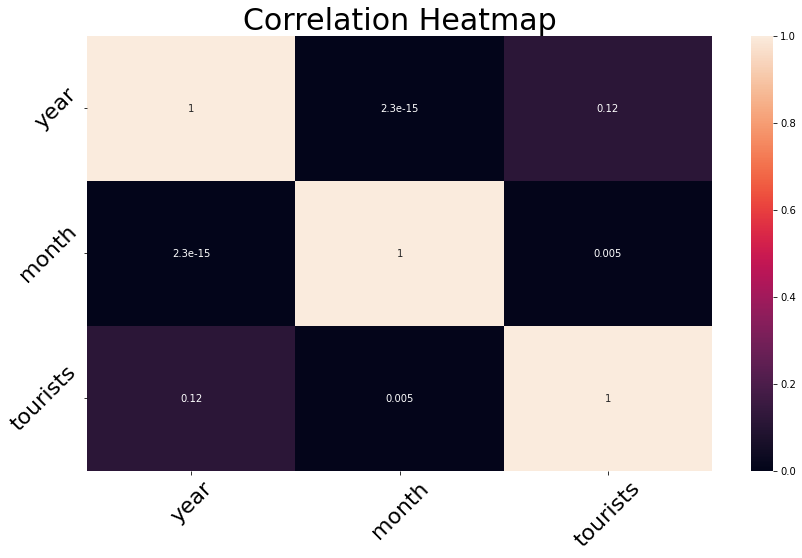

In [7]:
plt.figure(figsize=(14,8))
cr=sns.heatmap(df.corr(),annot=True)
cr.set_title('Correlation Heatmap',fontsize=30)
cr.set_xticklabels(cr.get_xticklabels(),rotation=45)
cr.set_yticklabels(cr.get_yticklabels(),rotation=45)
cr.tick_params(labelsize=22)

Text(0, 0.5, 'Tourists')

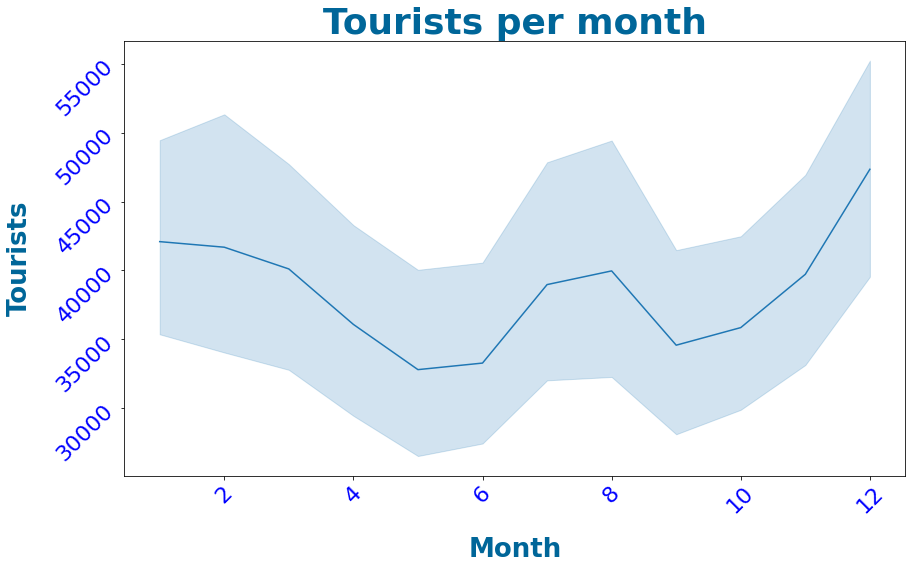

In [9]:
plt.figure(figsize=(14,8))
fig1 = sns.lineplot(x='month',y='tourists', data=df)
fig1.set_title('Tourists per month',fontsize=36,fontweight='bold',color='#006699')
fig1.tick_params(labelsize=22,rotation=45,labelcolor='blue',labelbottom=True,labeltop=False,labelleft=True,labelright=False)
fig1.set_xlabel('Month',fontsize=26,color='#006699',fontweight='bold',labelpad=20)
fig1.set_ylabel('Tourists',fontsize=26,color='#006699',fontweight='bold',labelpad=20)


#### **The above graph shows that number of tourist is rapidly increasing in the 6th and 7th month of the year (June July), than in nov and dec**

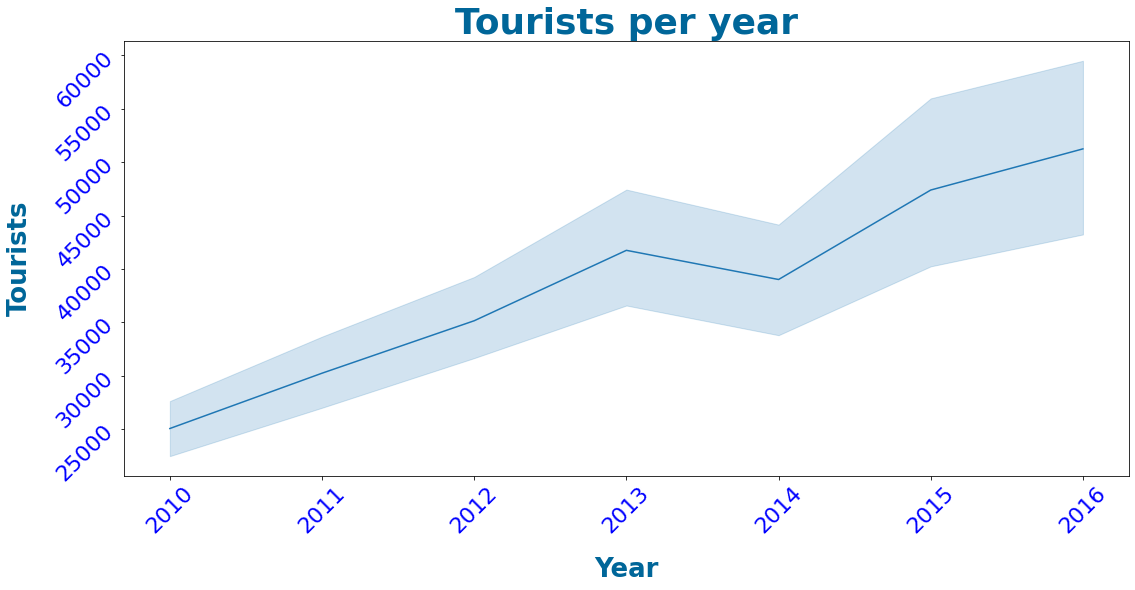

In [10]:
plt.figure(figsize=(18,8))
year = sns.lineplot(x='year', y='tourists', data=df)
year.set_title('Tourists per year',fontsize=36,fontweight='bold',color='#006699')
year.set_xlabel('Year',fontsize=26,color='#006699',fontweight='bold',labelpad=20)
year.set_ylabel('Tourists',fontsize=26,color='#006699',fontweight='bold',labelpad=20)
year.tick_params(labelsize=22,rotation=45,labelcolor='blue',labelbottom=True,labeltop=False,labelleft=True,labelright=False)

### **The above graph shows that number of tourist is increasing year by year**

In [12]:
year_wise_sum = df.groupby('year')['tourists'].sum().reset_index().sort_values(by='tourists',ascending=False,ignore_index=True)
year_wise_sum

,year,tourists
0,2016,32588303
1,2015,30137563
2,2013,26546725
3,2014,24809683
4,2012,22353903
5,2011,19230470
6,2010,15936400


In [13]:
percent = px.pie(year_wise_sum, values='tourists', names='year', 
                 color_discrete_sequence=px.colors.sequential.RdBu, 
                color='year',labels={'tourists':'Tourists'})                 
percent.update_layout(title_text='Year wise tourists',title_x=0.5,font=dict(size=18),
                      legend=dict(font=dict(size=18)),margin=dict(l=20,r=20,b=20,t=50))
percent.show()

### **The above pie chart shows that the number of tourist from the country is increasing year by year with percentage vise 2010- 2011- 2012- 2013- 2014- 2015- 2016**

In [14]:
group2 = df.groupby(['year',
                     'month'])['tourists'].sum().reset_index().sort_values(by='year',ascending=False,ignore_index=True)
group2

,year,month,tourists
0,2016,12,3057800
1,2016,6,2433255
2,2016,1,3001327
3,2016,2,3088876
4,2016,3,2948690
...,...,...,...
79,2010,9,1214810
80,2010,10,1316806
81,2010,11,1478856
82,2010,12,1819751


In [15]:
fig2 = px.bar(group2, x='year', y='tourists', color='month',barmode='group')
fig2.update_layout(title_text='Year wise tourists',title_x=0.5,font=dict(size=18))
fig2.show()

### **The above bar chart shows the number of tourist with respect to year and month**

[Text(0, 0, 'Africa'),
 Text(1, 0, 'Americas'),
 Text(2, 0, 'ASEAN'),
 Text(3, 0, 'EstAsia'),
 Text(4, 0, 'Europe'),
 Text(5, 0, 'MidEast'),
 Text(6, 0, 'Oceania'),
 Text(7, 0, 'SoAsia')]

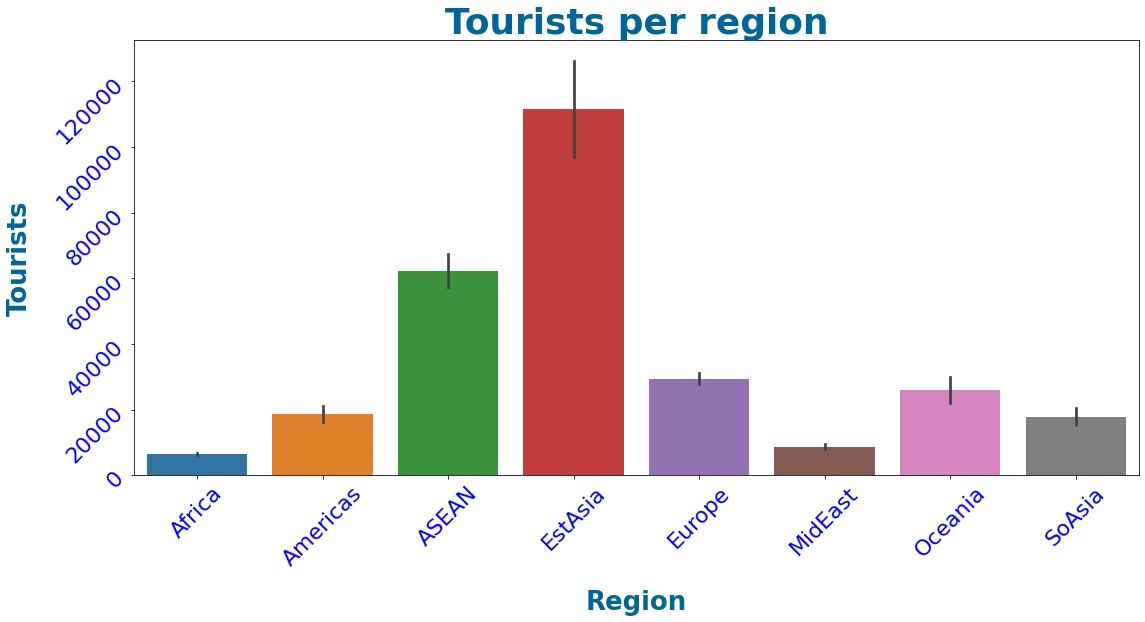

In [17]:
plt.figure(figsize=(18,8))
fig3 = sns.barplot(x='region',y='tourists',data=df)
fig3.set_title('Tourists per region',fontsize=36,fontweight='bold',color='#006699')
fig3.tick_params(labelsize=22,rotation=45,labelcolor='blue',labelbottom=True,labeltop=False,labelleft=True,labelright=False)
fig3.set_xlabel('Region',fontsize=26,color='#006699',fontweight='bold',labelpad=20)
fig3.set_ylabel('Tourists',fontsize=26,color='#006699',fontweight='bold',labelpad=20)
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)

## **The above bar chart gives the detail of tourist in different regions**

In [19]:
group3 = df.groupby(['nationality'])['tourists'].mean().reset_index().sort_values(by='tourists',ascending=False,ignore_index=True)

In [20]:
group3

,nationality,tourists
0,China,376547.940476
1,Malaysia,234998.809524
2,Japan,108367.333333
3,Russia,99714.630952
4,Korea,98157.619048
5,Laos,86325.952381
6,India,82565.297619
7,UnitedKingdom,75085.607143
8,Singapore,69338.285714
9,Australia,68943.833333


In [21]:
fig4 = px.histogram(group3.head(30), x='nationality', y='tourists', color='nationality')
fig4.update_layout(title_text='Nationality wise rate (top 30)',title_x=0.5,font=dict(size=18),
                   xaxis_title='National',yaxis_title='Tourists',margin=dict(l=20,r=20,b=20,t=50))

### **The above histogram shows the top 30% number of tourist in nation.**

In [22]:
fig4 = px.histogram(group3.tail(30), x='nationality', y='tourists', color='nationality')
fig4.update_layout(title_text='Nationality wise rate(Below 30)',title_x=0.5,font=dict(size=18),
                   xaxis_title='National',yaxis_title='Tourists',margin=dict(l=20,r=20,b=20,t=50))

### **The above histogram shows the below 30% number of tourist in nation.**

In [25]:
fig5 = px.scatter_3d(df, x='year', y='month', z='tourists',color='region',size='tourists')
fig5.update_layout(title_text='Year, Month and Tourists',title_x=0.5)

### **The above 3D-scatter plot shows the number of tourist in different regions with respect to year and month.**